1.This piece of code represents an undirected graph of Pakistani cities connected to each others. Each city is connected to one or more neighboring cities:

Gwadar is directly connected to Turbat.

Turbat connects to Gwadar and Khuzdar.

Khuzdar is a central hub connecting to Turbat, Dera Ghazi Khan, and Zhob.

Dera Ghazi Khan connects to Khuzdar and Faisalabad.

Zhob connects only to Khuzdar.

Faisalabad connects to Dera Ghazi Khan and Rawalpindi.

Rawalpindi connects to Faisalabad and Abbottabad.

Abbottabad connects only to Rawalpindi.

In [ ]:
# Define the graph as an adjacency list (dictionary)
pakistani_cities = {
    "Gwadar": ["Turbat"],
    "Turbat": ["Gwadar", "Khuzdar"],
    "Khuzdar": ["Turbat", "Dera Ghazi Khan", "Zhob"],
    "Dera Ghazi Khan": ["Khuzdar", "Faisalabad"],
    "Zhob": ["Khuzdar"],
    "Faisalabad": ["Dera Ghazi Khan", "Rawalpindi"],
    "Rawalpindi": ["Faisalabad", "Abbottabad"],
    "Abbottabad": ["Rawalpindi"]
}



2.This program models an undirected graph of Pakistani cities connected by roads. It includes two functions to find paths between cities: one uses Breadth-First Search (BFS) to find the shortest path, and the other uses Depth-First Search (DFS) to find any possible path. The graph and start/goal cities can be customized. In this example, it finds and prints paths from Karachi to Rahim Yar Khan using both search methods.

In [ ]:
from collections import deque

# New graph representing connections between cities
pakistan_cities = {
    "Karachi": ["Hyderabad", "Thatta"],
    "Hyderabad": ["Karachi", "Nawabshah"],
    "Thatta": ["Karachi"],
    "Nawabshah": ["Hyderabad", "Multan"],
    "Multan": ["Nawabshah", "Bahawalpur"],
    "Bahawalpur": ["Multan", "Sadiqabad"],
    "Sadiqabad": ["Bahawalpur", "Rahim Yar Khan"],
    "Rahim Yar Khan": ["Sadiqabad"]
}

def bfs_shortest_path(graph, start, goal):
    queue = deque([[start]])
    visited = set()

    while queue:
        path = queue.popleft()
        current_city = path[-1]

        if current_city == goal:
            return path

        if current_city not in visited:
            visited.add(current_city)
            for neighbor in graph.get(current_city, []):
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)
    return None

def dfs_path(graph, start, goal, path=None, visited=None):
    if path is None:
        path = []
    if visited is None:
        visited = set()

    path.append(start)
    visited.add(start)

    if start == goal:
        return path

    for neighbor in graph.get(start, []):
        if neighbor not in visited:
            result = dfs_path(graph, neighbor, goal, path.copy(), visited.copy())
            if result:
                return result
    return None

# Test with new cities
start_city = "Karachi"
goal_city = "Rahim Yar Khan"

bfs_result = bfs_shortest_path(pakistan_cities, start_city, goal_city)
print("BFS Shortest Path from Karachi to Rahim Yar Khan:", bfs_result)

dfs_result = dfs_path(pakistan_cities, start_city, goal_city)
print("DFS Path from Karachi to Rahim Yar Khan:", dfs_result)


BFS Shortest Path from Karachi to Rahim Yar Khan: ['Karachi', 'Hyderabad', 'Nawabshah', 'Multan', 'Bahawalpur', 'Sadiqabad', 'Rahim Yar Khan']
DFS Path from Karachi to Rahim Yar Khan: ['Karachi', 'Hyderabad', 'Nawabshah', 'Multan', 'Bahawalpur', 'Sadiqabad', 'Rahim Yar Khan']


BFS For ['Karachi', 'Hyderabad', 'Nawabshah', 'Multan', 'Bahawalpur', 'Sadiqabad', 'Rahim Yar Khan']

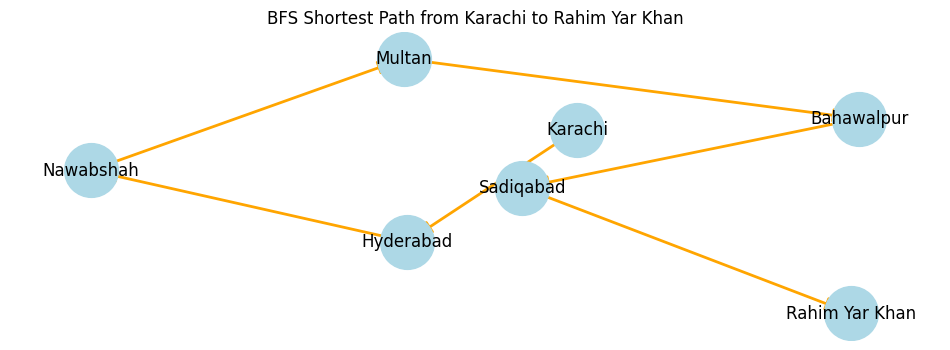

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# List of nodes in BFS path order
nodes = ['Karachi', 'Hyderabad', 'Nawabshah', 'Multan', 'Bahawalpur', 'Sadiqabad', 'Rahim Yar Khan']

# Add edges based on BFS shortest path
edges = [(nodes[i], nodes[i+1]) for i in range(len(nodes)-1)]
G.add_edges_from(edges)

# Plotting the graph with matplotlib
plt.figure(figsize=(12, 4))

# Position nodes using spring layout for a nice spread
pos = nx.spring_layout(G, seed=42, k=1)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1500)

# Draw edges with arrows to show direction
nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='orange', width=2, arrowsize=20)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

plt.title("BFS Shortest Path from Karachi to Rahim Yar Khan")
plt.axis('off')  # Turn off axis
plt.show()  # Display the plot


DFS for ['Karachi', 'Hyderabad', 'Nawabshah', 'Multan', 'Bahawalpur', 'Sadiqabad', 'Rahim Yar Khan']

DFS Path from Karachi to Rahim Yar Khan: ['Karachi', 'Hyderabad', 'Nawabshah', 'Multan', 'Bahawalpur', 'Sadiqabad', 'Rahim Yar Khan']


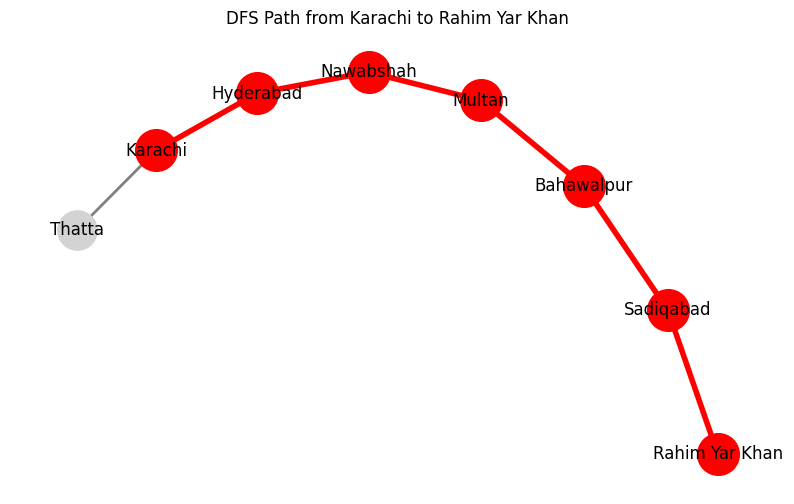

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Your graph dictionary
pakistan_cities = {
    "Karachi": ["Hyderabad", "Thatta"],
    "Hyderabad": ["Karachi", "Nawabshah"],
    "Thatta": ["Karachi"],
    "Nawabshah": ["Hyderabad", "Multan"],
    "Multan": ["Nawabshah", "Bahawalpur"],
    "Bahawalpur": ["Multan", "Sadiqabad"],
    "Sadiqabad": ["Bahawalpur", "Rahim Yar Khan"],
    "Rahim Yar Khan": ["Sadiqabad"]
}

# DFS function
def dfs_path(graph, start, goal, path=None, visited=None):
    if path is None:
        path = []
    if visited is None:
        visited = set()

    path.append(start)
    visited.add(start)

    if start == goal:
        return path

    for neighbor in graph.get(start, []):
        if neighbor not in visited:
            result = dfs_path(graph, neighbor, goal, path.copy(), visited.copy())
            if result:
                return result
    return None

# Find DFS path
start_city = "Karachi"
goal_city = "Rahim Yar Khan"
dfs_result = dfs_path(pakistan_cities, start_city, goal_city)
print("DFS Path from Karachi to Rahim Yar Khan:", dfs_result)

# Build NetworkX graph
G = nx.Graph()
for city, neighbors in pakistan_cities.items():
    for neighbor in neighbors:
        G.add_edge(city, neighbor)

# Edges on DFS path
dfs_edges = [(dfs_result[i], dfs_result[i+1]) for i in range(len(dfs_result)-1)]

# Plot graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)

# Draw all nodes
nx.draw_networkx_nodes(G, pos, node_color='lightgray', node_size=800)

# Highlight nodes on DFS path
nx.draw_networkx_nodes(G, pos, nodelist=dfs_result, node_color='red', node_size=900)

# Draw all edges lightly
nx.draw_networkx_edges(G, pos, edge_color='gray', width=2)

# Highlight DFS path edges
nx.draw_networkx_edges(G, pos, edgelist=dfs_edges, edge_color='red', width=4)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

plt.title("DFS Path from Karachi to Rahim Yar Khan")
plt.axis('off')
plt.show()
